# 구별 맛집 가격 점수화

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import pearsonr


In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [10]:
df = pd.read_csv('./data/맛집 데이터 3.5 이상 (1).csv')
df = df.drop('Unnamed: 0', axis=1)
df.tail()

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000
770,카츠곳간,4.6,구로구,서울특별시 구로구 공원로6가길 52 정진빌딩,일식,만원-2만원,2021-07-21,맛있다,5.0,4.0,1.0,0.0,3.680000


In [12]:
df = df.where(df['가격대'] != '0').dropna()
df['가격대'].value_counts()

 만원 미만      311
 만원-2만원     243
 2만원-3만원    102
 4만원 이상      76
 3만원-4만원     36
Name: 가격대, dtype: int64

In [14]:
gu_list=['도봉구','노원구','강북구','은평구','종로구','성북구','동대문구','중랑구','서대문구',\
          '마포구','중구','용산구','성동구','광진구','강동구','송파구','강남구',\
          '강서구','양천구','영등포구','동작구','서초구','관악구','금천구','구로구']
test_df = pd.DataFrame(gu_list)

In [15]:
a=df['가격대']==' 만원 미만'
b=df['가격대']==' 만원-2만원'
c=df['가격대']==' 2만원-3만원'
d=df['가격대']==' 3만원-4만원'
e=df['가격대']==' 4만원 이상'

In [16]:
a = df[a]
b = df[b]
c = df[c]
d = df[d]
e = df[e]

In [17]:
under10000 = a['구'].value_counts()
under20000 = b['구'].value_counts()
under30000 = c['구'].value_counts()
under40000 = d['구'].value_counts()
over40000 = e['구'].value_counts()

In [18]:
a = pd.DataFrame(under10000)
b = pd.DataFrame(under20000)
c = pd.DataFrame(under30000)
d = pd.DataFrame(under40000)
e = pd.DataFrame(over40000)

In [19]:
a = a.rename(columns={'구': '10000원 미만'})
a['구'] = a.index
a.set_index('구',inplace=True)

b = b.rename(columns={'구': '20000원 미만'})
b['구'] = b.index
b.set_index('구',inplace=True)

c = c.rename(columns={'구': '30000원 미만'})
c['구'] = c.index
c.set_index('구',inplace=True)

d = d.rename(columns={'구': '40000원 미만'})
d['구'] = d.index
d.set_index('구',inplace=True)

e = e.rename(columns={'구': '40000원 이상'})
e['구'] = e.index
e.set_index('구',inplace=True)

In [32]:
Fin_df= Fin_df.merge(e,left_index=True, right_index=True, how='outer')
Fin_df.head()

,10000원 미만,20000원 미만,30000원 미만,40000원 미만,40000원 이상
구,,,,,
강동구,8.0,5,2.0,NaN,NaN
광진구,10.0,10,NaN,2.0,NaN
성동구,28.0,9,9.0,1.0,1.0
용산구,17.0,23,13.0,7.0,11.0
중구,9.0,19,10.0,1.0,7.0


In [33]:
Fin_df = Fin_df.fillna(0)
Fin_df = Fin_df.astype('int')
Fin_df.head()

,10000원 미만,20000원 미만,30000원 미만,40000원 미만,40000원 이상
구,,,,,
강동구,8,5,2,0,0
광진구,10,10,0,2,0
성동구,28,9,9,1,1
용산구,17,23,13,7,11
중구,9,19,10,1,7


In [34]:
Fin_df = Fin_df.reset_index()
Fin_df.head()

,구,10000원 미만,20000원 미만,30000원 미만,40000원 미만,40000원 이상
0,강동구,8,5,2,0,0
1,광진구,10,10,0,2,0
2,성동구,28,9,9,1,1
3,용산구,17,23,13,7,11
4,중구,9,19,10,1,7


In [35]:
Fin_df['맛집수'] = Fin_df['10000원 미만'] + Fin_df['20000원 미만'] + Fin_df['30000원 미만'] + Fin_df['40000원 미만'] + Fin_df['40000원 이상']

In [36]:
Fin_df['가격 점수'] = (Fin_df['10000원 미만'] + 2*Fin_df['20000원 미만'] + 3*Fin_df['30000원 미만'] + 4*Fin_df['40000원 미만'] + 5*Fin_df['40000원 이상']) / Fin_df['맛집수']

In [37]:
Fin_df

,구,10000원 미만,20000원 미만,30000원 미만,40000원 미만,40000원 이상,맛집수,가격 점수
0,강동구,8,5,2,0,0,15,1.600000
1,광진구,10,10,0,2,0,22,1.727273
2,성동구,28,9,9,1,1,48,1.708333
3,용산구,17,23,13,7,11,71,2.605634
4,중구,9,19,10,1,7,46,2.521739
5,강남구,13,16,14,13,25,81,3.259259
6,강북구,3,1,0,0,0,4,1.250000
7,강서구,5,6,2,0,0,13,1.769231
8,관악구,19,7,1,0,0,27,1.333333
9,구로구,1,4,1,0,0,6,2.000000


In [48]:
Fin_df.to_csv('./data/맛집가격점수.csv')

In [39]:
view = Fin_df[['구','가격 점수']]
view.head()

,구,가격 점수
0,강동구,1.600000
1,광진구,1.727273
2,성동구,1.708333
3,용산구,2.605634
4,중구,2.521739


In [42]:
view['가격 점수']

0     1.600000
1     1.727273
2     1.708333
3     2.605634
4     2.521739
5     3.259259
6     1.250000
7     1.769231
8     1.333333
9     2.000000
10    2.000000
11    2.166667
12    1.300000
13    1.500000
14    1.809524
15    2.013699
16    1.755556
17    2.276923
18    1.600000
19    2.122449
20    2.000000
21    2.000000
22    1.700000
23    1.878788
24    1.333333
Name: 가격 점수, dtype: float64

<BarContainer object of 25 artists>

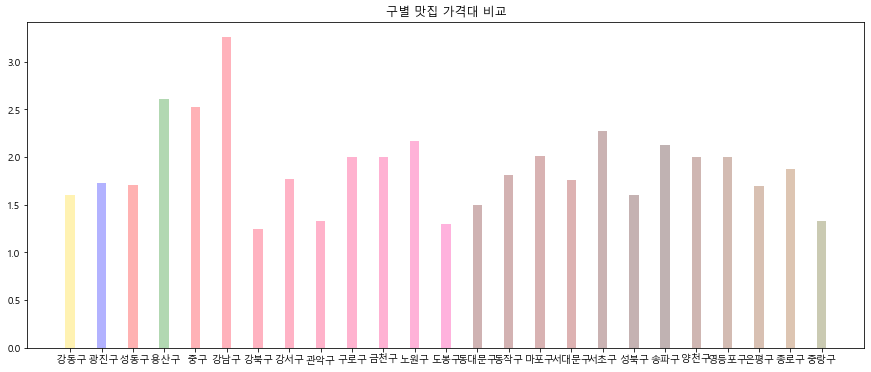

In [47]:
y=view['구']
x=view['가격 점수']

xlabel=x
plt.figure(figsize=(15,6))
plt.title('구별 맛집 가격대 비교')
# x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] #xticks 시 위치 표시에 사용할 변수
plt.bar(y,x, width=0.3, color = ['gold', 'b', '#FF0000', 'green','#FF0010','#FF0020','#FF0030',\
                                 '#FF0040','#FF0050','#FF0060','#FF0070','#FF0080','#FF0090',\
                                 '#600000','#700000','#800000','#900000','#500000','#400000','#300000',\
                                '#601000','#702000','#803000','#904000','#505000'], alpha = 0.3)